# Loading Data

In this workbook we will go over how you can load the data for our exercises

We will be using the data from the PHUSE Open Data Repository

Follow the instructions in [README.md](../README.md) to get setup

##  Data processing in Python 

There are a couple of key libraries we will use:
* [pandas](https://pandas.pydata.org/) - for processing data
* [matplotlib](https://matplotlib.org/) - for creating visual representations of the data
* [lxml](https://lxml.de) - processing the define.xml (or any other XML)

You will find that in the majority of cases someone will have written a module to do what you want to do; all you need to do is be able to find it, and if necessary validate it.  Python Packages are published into the Python Package Index [PyPI](https://pypi.org) so you can search for a module using keywords, for example:
* [Bayesian Analysis](https://pypi.org/search/?q=bayesian)
* [Linear Regression](https://pypi.org/search/?q=linear+regression)
* [ODM](https://pypi.org/search/?q=cdisc+odm)

You can also create your own package repository or build packages from a git repository; this is a good way for a company to facilitate the building out of standard libraries for internal use or building out a validated Python module repository.

In [1]:
# import the libraries we are going to use

# Pandas data handling library
import pandas as pd
from pandas import DataFrame
# Typing allows you to be typesafe with Python
from typing import Optional
# URLlib is the built in Library for working with the web
import urllib
# requests is a mode
import requests
# lxml is a library for processing XML documents
from lxml import etree
from lxml.etree import _ElementTree


In [2]:
# define a prefix for where the files can be found
PREFIX = "https://github.com/phuse-org/phuse-scripts/raw/master/data/sdtm/cdiscpilot01/"

def check_link(url: str) -> bool:
    """
    ensure that the URL exists
    :param url: The target URL we will attempt to load
    """
    # this will attempt to open the URL, and extract the response status code
    # - status codes are a HTTP convention for responding to requests
    # 200 - OK
    # 403 - Not authorized   
    # 404 - Not found   
    status_code = urllib.request.urlopen(url).getcode()
    return status_code == 200

def load_cdiscpilot_dataset(domain_prefix: str) -> Optional[DataFrame]:
    """
    load a CDISC Pilot Dataset from the GitHub site
    :param domain_prefix: The two letter Domain prefix that is used to id the dataset
    """
    # define the target for our read_sas directive
    target = f"{PREFIX}{domain_prefix.lower()}.xpt"
    # make sure that the URL exists first
    if check_link(target):
        # load in the dataset 
        dataset = pd.read_sas(target, encoding="utf-8")
        # dataset = pd.read_sas(target)
        return dataset
    return None


def load_cdiscpilot_define() -> _ElementTree:
    """
    load the define.xml for the CDISC Pilot project
    """
    # define the target for our read_sas directive
    target = f"{PREFIX}define.xml"
    # make sure that the URL exists first
    if check_link(target):
        # load in the file 
        page = requests.get(target)
        tree = etree.fromstring(page.content)
        # dataset = pd.read_sas(target)
        return tree
    return None
  

In [3]:
# Load in a dataset - DM
dm = load_cdiscpilot_dataset('DM')

In [4]:
# Take a look at a table
dm.head()

,STUDYID,DOMAIN,USUBJID,SUBJID,RFSTDTC,RFENDTC,RFXSTDTC,RFXENDTC,RFICDTC,RFPENDTC,...,SEX,RACE,ETHNIC,ARMCD,ARM,ACTARMCD,ACTARM,COUNTRY,DMDTC,DMDY
0,CDISCPILOT01,DM,01-701-1015,1015,2014-01-02,2014-07-02,2014-01-02,2014-07-02,,2014-07-02T11:45,...,F,WHITE,HISPANIC OR LATINO,Pbo,Placebo,Pbo,Placebo,USA,2013-12-26,-7.0
1,CDISCPILOT01,DM,01-701-1023,1023,2012-08-05,2012-09-02,2012-08-05,2012-09-01,,2013-02-18,...,M,WHITE,HISPANIC OR LATINO,Pbo,Placebo,Pbo,Placebo,USA,2012-07-22,-14.0
2,CDISCPILOT01,DM,01-701-1028,1028,2013-07-19,2014-01-14,2013-07-19,2014-01-14,,2014-01-14T11:10,...,M,WHITE,NOT HISPANIC OR LATINO,Xan_Hi,Xanomeline High Dose,Xan_Hi,Xanomeline High Dose,USA,2013-07-11,-8.0
3,CDISCPILOT01,DM,01-701-1033,1033,2014-03-18,2014-04-14,2014-03-18,2014-03-31,,2014-09-15,...,M,WHITE,NOT HISPANIC OR LATINO,Xan_Lo,Xanomeline Low Dose,Xan_Lo,Xanomeline Low Dose,USA,2014-03-10,-8.0
4,CDISCPILOT01,DM,01-701-1034,1034,2014-07-01,2014-12-30,2014-07-01,2014-12-30,,2014-12-30T09:50,...,F,WHITE,NOT HISPANIC OR LATINO,Xan_Hi,Xanomeline High Dose,Xan_Hi,Xanomeline High Dose,USA,2014-06-24,-7.0


In [5]:
# Generate a Frequency Table for SEX
pd.crosstab(index=dm["SEX"], columns='count', colnames=["SEX"])

SEX,count
SEX,
F,179
M,127


In [6]:
# a two-way frequency table (Age by Sex)
pd.crosstab(index=dm["AGE"], columns=dm["SEX"])

SEX,F,M
AGE,,
50.0,1,0
51.0,0,1
52.0,0,1
54.0,2,0
56.0,4,2
57.0,3,2
59.0,4,0
60.0,3,0
61.0,2,4


<AxesSubplot:xlabel='AGE'>

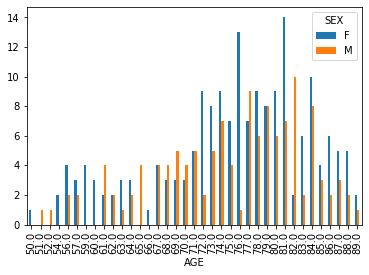

In [7]:
# Distribution of ages for gender
pd.crosstab(index=dm["AGE"], columns=dm["SEX"]).plot.bar()

In [8]:
# Generate age distributions
bins = [50, 55, 60, 65, 70, 75, 80, 85, 90]
labels = ["50-55", "55-60", "60-65", "65-70", "70-75", "75-80", "80-85", "85-90"]
dm["AGEBAND"] = pd.cut(dm['AGE'], bins=bins, labels=labels)

<AxesSubplot:xlabel='AGEBAND'>

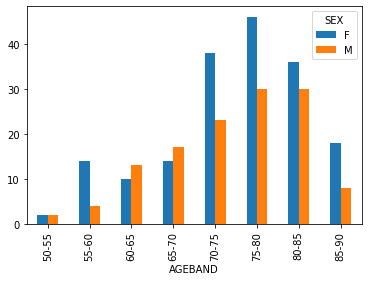

In [9]:
# Plot the data using bands
pd.crosstab(index=dm["AGEBAND"], columns=dm["SEX"]).plot.bar()

In [10]:
# Load the VS dataset
vs = load_cdiscpilot_dataset('VS')

In [11]:
# Details on the VS dataset
vs.shape

print(f"Dataset VS has {vs.shape[0]} records")

Dataset VS has 29643 records


In [12]:
# Get the first ten rows

vs.loc[0:10]

,STUDYID,DOMAIN,USUBJID,VSSEQ,VSTESTCD,VSTEST,VSPOS,VSORRES,VSORRESU,VSSTRESC,...,VSBLFL,VISITNUM,VISIT,VISITDY,VSDTC,VSDY,VSTPT,VSTPTNUM,VSELTM,VSTPTREF
0,CDISCPILOT01,VS,01-701-1015,1.0,DIABP,Diastolic Blood Pressure,SUPINE,64,mmHg,64,...,,1.0,SCREENING 1,-7.0,2013-12-26,-7.0,AFTER LYING DOWN FOR 5 MINUTES,815.0,PT5M,PATIENT SUPINE
1,CDISCPILOT01,VS,01-701-1015,2.0,DIABP,Diastolic Blood Pressure,STANDING,83,mmHg,83,...,,1.0,SCREENING 1,-7.0,2013-12-26,-7.0,AFTER STANDING FOR 1 MINUTE,816.0,PT1M,PATIENT STANDING
2,CDISCPILOT01,VS,01-701-1015,3.0,DIABP,Diastolic Blood Pressure,STANDING,57,mmHg,57,...,,1.0,SCREENING 1,-7.0,2013-12-26,-7.0,AFTER STANDING FOR 3 MINUTES,817.0,PT3M,PATIENT STANDING
3,CDISCPILOT01,VS,01-701-1015,4.0,DIABP,Diastolic Blood Pressure,SUPINE,68,mmHg,68,...,,2.0,SCREENING 2,-1.0,2013-12-31,-2.0,AFTER LYING DOWN FOR 5 MINUTES,815.0,PT5M,PATIENT SUPINE
4,CDISCPILOT01,VS,01-701-1015,5.0,DIABP,Diastolic Blood Pressure,STANDING,59,mmHg,59,...,,2.0,SCREENING 2,-1.0,2013-12-31,-2.0,AFTER STANDING FOR 1 MINUTE,816.0,PT1M,PATIENT STANDING
5,CDISCPILOT01,VS,01-701-1015,6.0,DIABP,Diastolic Blood Pressure,STANDING,71,mmHg,71,...,,2.0,SCREENING 2,-1.0,2013-12-31,-2.0,AFTER STANDING FOR 3 MINUTES,817.0,PT3M,PATIENT STANDING
6,CDISCPILOT01,VS,01-701-1015,7.0,DIABP,Diastolic Blood Pressure,SUPINE,56,mmHg,56,...,Y,3.0,BASELINE,1.0,2014-01-02,1.0,AFTER LYING DOWN FOR 5 MINUTES,815.0,PT5M,PATIENT SUPINE
7,CDISCPILOT01,VS,01-701-1015,8.0,DIABP,Diastolic Blood Pressure,STANDING,51,mmHg,51,...,Y,3.0,BASELINE,1.0,2014-01-02,1.0,AFTER STANDING FOR 1 MINUTE,816.0,PT1M,PATIENT STANDING
8,CDISCPILOT01,VS,01-701-1015,9.0,DIABP,Diastolic Blood Pressure,STANDING,61,mmHg,61,...,Y,3.0,BASELINE,1.0,2014-01-02,1.0,AFTER STANDING FOR 3 MINUTES,817.0,PT3M,PATIENT STANDING
9,CDISCPILOT01,VS,01-701-1015,10.0,DIABP,Diastolic Blood Pressure,SUPINE,67,mmHg,67,...,,3.5,AMBUL ECG PLACEMENT,13.0,2014-01-14,13.0,AFTER LYING DOWN FOR 5 MINUTES,815.0,PT5M,PATIENT SUPINE


In [24]:
# Lets try dumping the data into a file

vs.to_csv("vs.csv", header=True, index=False)

In [25]:
# Ditto for the DM Dataset

dm.to_csv("dm.csv", header=True, index=False)

In [13]:
# Generate a distribution for the values

tests = vs.groupby("VSTESTCD")["VSORRES"].sum()

In [14]:
print(tests)

VSTESTCD
DIABP     6483576859715651616761655650546455537261535563...
HEIGHT    58.064.070.069.061.058.5066.5062.371.571.066.8...
PULSE     5762655660575659596165615861625962596769655556...
SYSBP     1311291471381371451301211311371271461141211321...
TEMP      96.997.097.296.697.797.097.597.498.097.497.997...
WEIGHT    119.0120.0117.0119.0117.0117.0117.0117.0117.01...
Name: VSORRES, dtype: object


In [15]:
# Weird right?  We need to check the type of the column
vs.dtypes


STUDYID      object
DOMAIN       object
USUBJID      object
VSSEQ       float64
VSTESTCD     object
VSTEST       object
VSPOS        object
VSORRES      object
VSORRESU     object
VSSTRESC     object
VSSTRESN    float64
VSSTRESU     object
VSSTAT       object
VSLOC        object
VSBLFL       object
VISITNUM    float64
VISIT        object
VISITDY     float64
VSDTC        object
VSDY        float64
VSTPT        object
VSTPTNUM    float64
VSELTM       object
VSTPTREF     object
dtype: object

In [16]:
# ok, that makes sense - an object is not numeric....
tests = vs.groupby("VSTESTCD")["VSSTRESN"].mean().reset_index()

In [17]:
print(tests)

  VSTESTCD    VSSTRESN
0    DIABP   75.780134
1   HEIGHT  163.927953
2    PULSE   73.031947
3    SYSBP  134.361853
4     TEMP   36.587438
5   WEIGHT   66.623273


In [18]:
# Lets join the DM dataset

labelled = vs.merge(dm, on="USUBJID")
labelled.head()

,STUDYID_x,DOMAIN_x,USUBJID,VSSEQ,VSTESTCD,VSTEST,VSPOS,VSORRES,VSORRESU,VSSTRESC,...,RACE,ETHNIC,ARMCD,ARM,ACTARMCD,ACTARM,COUNTRY,DMDTC,DMDY,AGEBAND
0,CDISCPILOT01,VS,01-701-1015,1.0,DIABP,Diastolic Blood Pressure,SUPINE,64,mmHg,64,...,WHITE,HISPANIC OR LATINO,Pbo,Placebo,Pbo,Placebo,USA,2013-12-26,-7.0,60-65
1,CDISCPILOT01,VS,01-701-1015,2.0,DIABP,Diastolic Blood Pressure,STANDING,83,mmHg,83,...,WHITE,HISPANIC OR LATINO,Pbo,Placebo,Pbo,Placebo,USA,2013-12-26,-7.0,60-65
2,CDISCPILOT01,VS,01-701-1015,3.0,DIABP,Diastolic Blood Pressure,STANDING,57,mmHg,57,...,WHITE,HISPANIC OR LATINO,Pbo,Placebo,Pbo,Placebo,USA,2013-12-26,-7.0,60-65
3,CDISCPILOT01,VS,01-701-1015,4.0,DIABP,Diastolic Blood Pressure,SUPINE,68,mmHg,68,...,WHITE,HISPANIC OR LATINO,Pbo,Placebo,Pbo,Placebo,USA,2013-12-26,-7.0,60-65
4,CDISCPILOT01,VS,01-701-1015,5.0,DIABP,Diastolic Blood Pressure,STANDING,59,mmHg,59,...,WHITE,HISPANIC OR LATINO,Pbo,Placebo,Pbo,Placebo,USA,2013-12-26,-7.0,60-65


In [19]:
labelled_tests = labelled.groupby(["VSTESTCD","SEX", "AGEBAND"])["VSSTRESN"].mean().reset_index()
print(labelled_tests)

   VSTESTCD SEX AGEBAND   VSSTRESN
0     DIABP   F   50-55  78.777778
1     DIABP   F   55-60  79.432796
2     DIABP   F   60-65  73.737589
3     DIABP   F   65-70  74.283537
4     DIABP   F   70-75  76.868478
..      ...  ..     ...        ...
91   WEIGHT   M   65-70  72.250301
92   WEIGHT   M   70-75  80.717931
93   WEIGHT   M   75-80  75.320553
94   WEIGHT   M   80-85  72.801127
95   WEIGHT   M   85-90  67.528846

[96 rows x 4 columns]


In [20]:
# now, let's look at the define

# the way we do this is to load the content from the URL, and then pass it off to the XML parsing library
odm = load_cdiscpilot_define()

In [21]:
# XML documents can be treated as a tree, 
# * root item (root)
# * elements (branches)
# * attributes (leaves)

# In this case we have a root item that is an CDISC Operational Data Model (ODM)
# `tag` is the way of working out what type of element we have
print(odm.tag)

# we can look at the attributes using the .get method
print(odm.get("FileOID"))
print(odm.get("CreationDateTime"))


{http://www.cdisc.org/ns/odm/v1.2}ODM
CDISCPILOT01
2012-03-15T11:09:08


# Namespaces

XML documents use a schema document to define what elements/attributes are permissible (or required/expected).  It is possible to extend a schema to incorporate extra elements/attributes; these attributes exist alongside the existing elements by having them under different namespaces


In [22]:
# look at the namespaces
print(odm.nsmap)

{None: 'http://www.cdisc.org/ns/odm/v1.2', 'xsi': 'http://www.w3.org/2001/XMLSchema-instance', 'xlink': 'http://www.w3.org/1999/xlink', 'def': 'http://www.cdisc.org/ns/def/v1.0'}


In [23]:
# in this the default namespace is ODM 1.2, with define.xml present in the def namespace

# let's get the MetadataVersion element
nsmap = odm.nsmap
nsmap["ODM"] = odm.nsmap.get(None)
mdv = odm.find(".//ODM:MetaDataVersion", nsmap)

In [24]:
# let's take a look at the define attributes
define_ns = nsmap.get('def')
print(define_ns)
# get the define version
for attribute in ("DefineVersion", "StandardName", "StandardVersion"):
    # attributes should be prefixed with the namespace
    attr = f"{{{define_ns}}}{attribute}"
    if mdv.get(attr):
        print(f"{attribute} -> {mdv.get(attr)}")


http://www.cdisc.org/ns/def/v1.0
DefineVersion -> 1.0.0
StandardName -> CDISC SDTM
StandardVersion -> 3.1.2


In [25]:
# Remember the Standard Version here!  We will come back to it

# you can scan over the different child elements using the findall method
for itemdef in mdv.findall("./ODM:ItemDef", namespaces=nsmap):
    if itemdef.find("./ODM:CodeListRef", namespaces=nsmap) is not None:
        codelistref = itemdef.find("./ODM:CodeListRef", namespaces=nsmap)
        print(f"Item {itemdef.get('OID')} has CodeList: {codelistref.get('CodeListOID')}")
    else:
        print(f"Item: {itemdef.get('OID')}")

Item: AE.STUDYID
Item: AE.DOMAIN
Item: AE.USUBJID
Item: AE.AESEQ
Item: AE.AESPID
Item: AE.AETERM
Item AE.AELLT has CodeList: AEDICT
Item: AE.AELLTCD
Item AE.AEDECOD has CodeList: AEDICT
Item: AE.AEPTCD
Item AE.AEHLT has CodeList: AEDICT
Item: AE.AEHLTCD
Item AE.AEHLGT has CodeList: AEDICT
Item: AE.AEHLGTCD
Item AE.AEBODSYS has CodeList: AEDICT
Item: AE.AEBDSYCD
Item AE.AESOC has CodeList: AEDICT
Item: AE.AESOCCD
Item AE.AESEV has CodeList: SEV
Item AE.AESER has CodeList: YN
Item: AE.AEACN
Item AE.AEREL has CodeList: AECAUS
Item AE.AEOUT has CodeList: OUT
Item AE.AESCAN has CodeList: YN
Item AE.AESCONG has CodeList: YN
Item AE.AESDISAB has CodeList: YN
Item AE.AESDTH has CodeList: YN
Item AE.AESHOSP has CodeList: YN
Item AE.AESLIFE has CodeList: YN
Item AE.AESOD has CodeList: YN
Item: AE.AEDTC
Item: AE.AESTDTC
Item: AE.AEENDTC
Item: AE.AESTDY
Item: AE.AEENDY
Item: CM.STUDYID
Item: CM.DOMAIN
Item: CM.USUBJID
Item: CM.CMSEQ
Item: CM.CMSPID
Item: CM.CMTRT
Item CM.CMDECOD has CodeList: DRUG

Loading XML is a very useful technique, this example is a simple load and navigate of the define data structure.  I recommend checking out [odmlib](https://pypi.org/project/odmlib/) which is a library that makes processing and manipulation of CDISC ODM documents much more straight forward (written by the venerable [Sam Hume](https://github.com/swhume))

# Summary
In this set we've gone over some elementary activities dealing accessing/loading data; there were some elementary expeditions into how data can be manipulated/visualised using pandas and some simple navigation of an XML document.  

Next we're going to take a look at how accessing data over the web works.